In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import openpyxl



In [107]:
df_trash_amount = pd.read_csv("Müllmengen.csv",sep=";")
df_trash_amount["Tonnage"] = df_trash_amount["Tonnage"].str.replace(",",".").astype(float)
df_trash_amount.head()

,Monat,KW,Jahr,Datum,Hof,Schicht,Tour,Tonnage,Abfallart
0,1.0,1.0,2019.0,02.01.19,VMF,1.0,1.0,5.59,BIO
1,1.0,1.0,2019.0,02.01.19,VMF,1.0,4.0,3.23,BIO
2,1.0,1.0,2019.0,02.01.19,VMF,1.0,5.0,5.68,BIO
3,1.0,1.0,2019.0,02.01.19,VMF,1.0,6.0,5.48,BIO
4,1.0,1.0,2019.0,02.01.19,VMF,1.0,7.0,7.84,BIO


In [108]:
# read data of number of relocations from/to Berlin + population status
df_population_relocation = pd.read_csv("Bevoelkerungsentwicklung_stand_2019_bis_2023.csv",sep=";",header=0)

df_relocation = df_population_relocation.drop(columns=["Population status month end", "Population status month begin", "Population status balance"])
df_relocation[:2] = df_relocation[:2].astype(float)
df_relocation.head()
df_relocation.dtypes


Month                               int64
Year                                int64
Number of relocation to Berlin      int64
Number of relocation from Berlin    int64
Relocation balance                  int64
dtype: object

In [109]:
# Define a dictionary with the number of days for each month
days_in_month = {
    1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30,
    7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31
}

# Function to divide the last three columns by the number of days in the month
def divide_by_days(row):
    days = days_in_month[row['Month']]
    row['Number of relocation to Berlin'] /= days
    row['Number of relocation from Berlin'] /= days
    row['Relocation balance'] /= days
    return row


# Apply the function to the dataframe
df_relocation_avg = df_relocation.apply(divide_by_days, axis=1)
df_relocation_avg.head()

/var/folders/yz/c6jgyjbs1575zd0rjq04jbtr0000gn/T/ipykernel_1425/1907134522.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '470.5806451612903' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row['Number of relocation to Berlin'] /= days
/var/folders/yz/c6jgyjbs1575zd0rjq04jbtr0000gn/T/ipykernel_1425/1907134522.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '578.1428571428571' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row['Number of relocation to Berlin'] /= days
/var/folders/yz/c6jgyjbs1575zd0rjq04jbtr0000gn/T/ipykernel_1425/1907134522.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '481.06451612903226' has dtype incompatible with int64, plea

,Month,Year,Number of relocation to Berlin,Number of relocation from Berlin,Relocation balance
0,1.0,2019.0,470.580645,378.580645,92.000000
1,2.0,2019.0,578.142857,430.785714,147.357143
2,3.0,2019.0,481.064516,407.129032,73.935484
3,4.0,2019.0,455.733333,401.200000,54.533333
4,5.0,2019.0,386.612903,421.903226,-35.290323


In [110]:
df_population =df_population_relocation[["Month","Year","Population status month end"]]
df_population.head()

,Month,Year,Population status month end
0,1,2019,3647360
1,2,2019,3650993
2,3,2019,3652885
3,4,2019,3654703
4,5,2019,3653874


In [111]:
df_popu_relo = df_population.join(df_relocation_avg.iloc[:,2:])
df_popu_relo.head()

,Month,Year,Population status month end,Number of relocation to Berlin,Number of relocation from Berlin,Relocation balance
0,1,2019,3647360,470.580645,378.580645,92.000000
1,2,2019,3650993,578.142857,430.785714,147.357143
2,3,2019,3652885,481.064516,407.129032,73.935484
3,4,2019,3654703,455.733333,401.200000,54.533333
4,5,2019,3653874,386.612903,421.903226,-35.290323


In [112]:
df_merged = pd.merge(df_trash_amount, df_popu_relo, left_on=['Monat', 'Jahr'], right_on=['Month', 'Year'])
df_merged.head()

,Monat,KW,Jahr,Datum,Hof,Schicht,Tour,Tonnage,Abfallart,Month,Year,Population status month end,Number of relocation to Berlin,Number of relocation from Berlin,Relocation balance
0,1.0,1.0,2019.0,02.01.19,VMF,1.0,1.0,5.59,BIO,1,2019,3647360,470.580645,378.580645,92.0
1,1.0,1.0,2019.0,02.01.19,VMF,1.0,4.0,3.23,BIO,1,2019,3647360,470.580645,378.580645,92.0
2,1.0,1.0,2019.0,02.01.19,VMF,1.0,5.0,5.68,BIO,1,2019,3647360,470.580645,378.580645,92.0
3,1.0,1.0,2019.0,02.01.19,VMF,1.0,6.0,5.48,BIO,1,2019,3647360,470.580645,378.580645,92.0
4,1.0,1.0,2019.0,02.01.19,VMF,1.0,7.0,7.84,BIO,1,2019,3647360,470.580645,378.580645,92.0


Text(0, 0.5, 'Tonnage')

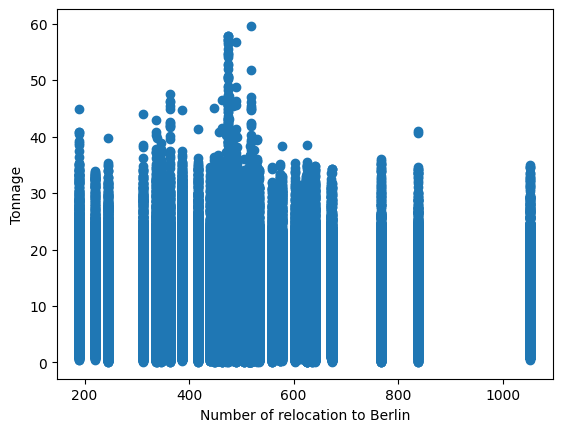

In [113]:
plt.scatter(df_merged['Number of relocation to Berlin'], df_merged['Tonnage'])
plt.xlabel('Number of relocation to Berlin')
plt.ylabel('Tonnage')

In [114]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [115]:
df_merged.head()

,Monat,KW,Jahr,Datum,Hof,Schicht,Tour,Tonnage,Abfallart,Month,Year,Population status month end,Number of relocation to Berlin,Number of relocation from Berlin,Relocation balance
0,1.0,1.0,2019.0,02.01.19,VMF,1.0,1.0,5.59,BIO,1,2019,3647360,470.580645,378.580645,92.0
1,1.0,1.0,2019.0,02.01.19,VMF,1.0,4.0,3.23,BIO,1,2019,3647360,470.580645,378.580645,92.0
2,1.0,1.0,2019.0,02.01.19,VMF,1.0,5.0,5.68,BIO,1,2019,3647360,470.580645,378.580645,92.0
3,1.0,1.0,2019.0,02.01.19,VMF,1.0,6.0,5.48,BIO,1,2019,3647360,470.580645,378.580645,92.0
4,1.0,1.0,2019.0,02.01.19,VMF,1.0,7.0,7.84,BIO,1,2019,3647360,470.580645,378.580645,92.0


In [133]:
# df_merged.drop(columns=["Month","Year"],inplace=True)
df_avg = df_merged.groupby(['Jahr', 'Monat'])[['Tonnage', 'Number of relocation to Berlin', 'Number of relocation from Berlin', 'Population status month end']].mean()
df_avg.head()

Tonnage  Number of relocation to Berlin  \
Jahr   Monat                                              
2019.0 1.0    13.151029                      470.580645   
       2.0    13.233680                      578.142857   
       3.0    13.279736                      481.064516   
       4.0    13.325477                      455.733333   
       5.0    12.855768                      386.612903   

              Number of relocation from Berlin  Population status month end  
Jahr   Monat                                                                 
2019.0 1.0                          378.580645                    3647360.0  
       2.0                          430.785714                    3650993.0  
       3.0                          407.129032                    3652885.0  
       4.0                          401.200000                    3654703.0  
       5.0                          421.903226                    3653874.0

In [134]:
df_avg = df_avg.reset_index()

In [ ]:
correlation_matrix = df_avg[['Tonnage', 'Number of relocation to Berlin']].corr()
print(correlation_matrix)

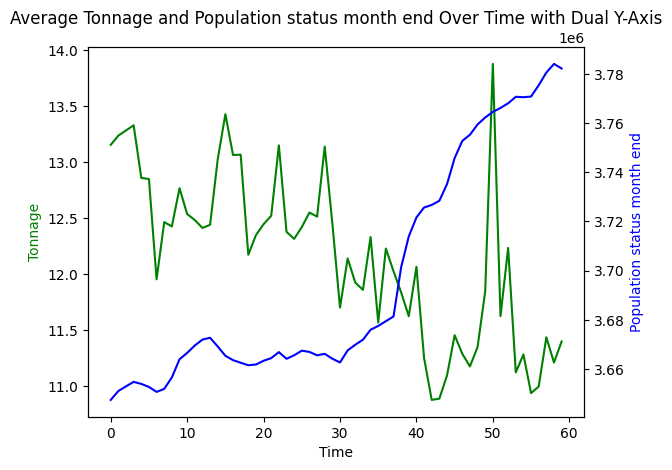

In [135]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df_avg.index, df_avg['Tonnage'], 'g-')
ax2.plot(df_avg.index, df_avg['Population status month end'], 'b-')

ax1.set_xlabel('Time')
ax1.set_ylabel('Tonnage', color='g')
ax2.set_ylabel('Population status month end', color='b')

plt.title('Average Tonnage and Population status month end Over Time with Dual Y-Axis')
plt.show()

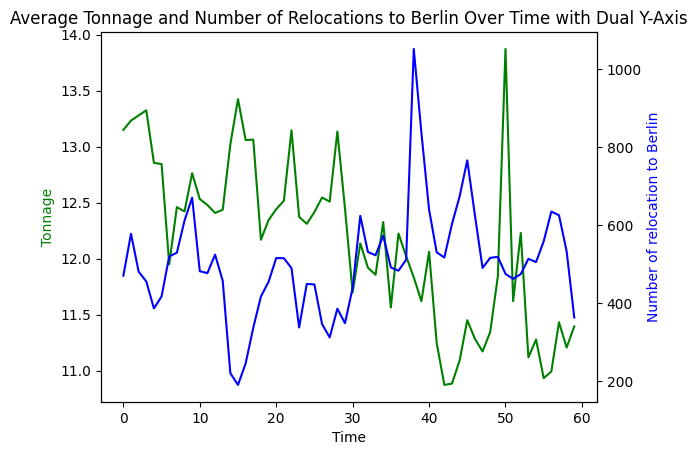

In [131]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df_avg.index, df_avg['Tonnage'], 'g-')
ax2.plot(df_avg.index, df_avg['Number of relocation to Berlin'], 'b-')

ax1.set_xlabel('Time')
ax1.set_ylabel('Tonnage', color='g')
ax2.set_ylabel('Number of relocation to Berlin', color='b')

plt.title('Average Tonnage and Number of Relocations to Berlin Over Time with Dual Y-Axis')
plt.show()

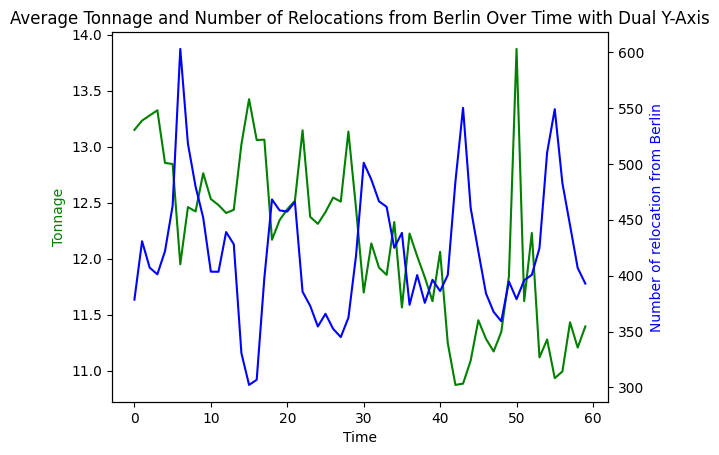

In [132]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df_avg.index, df_avg['Tonnage'], 'g-')
ax2.plot(df_avg.index, df_avg['Number of relocation from Berlin'], 'b-')

ax1.set_xlabel('Time')
ax1.set_ylabel('Tonnage', color='g')
ax2.set_ylabel('Number of relocation from Berlin', color='b')

plt.title('Average Tonnage and Number of Relocations from Berlin Over Time with Dual Y-Axis')
plt.show()